In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
np.random.seed(21) ## numeros ficarem iguais o da turma
valores = np.random.randint(0,1001,50) ## numero aleatório

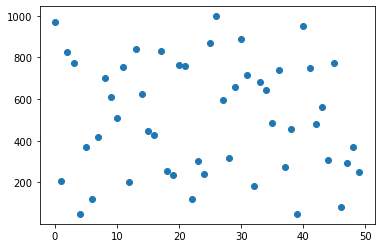

In [15]:
plt.scatter(range(len(valores)),valores)
plt.show()

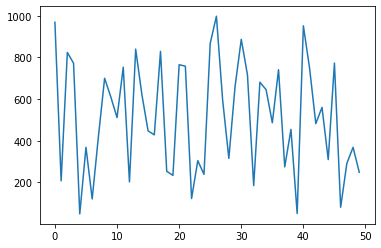

In [16]:
plt.plot(range(len(valores)),valores)
plt.show()

In [17]:
valores =  np.sort(valores) ## organizar valores

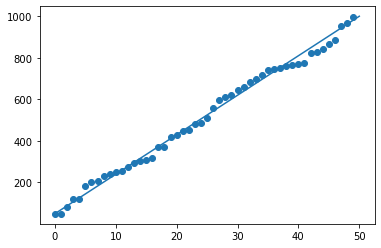

In [18]:
plt.scatter(range(len(valores)),valores)
plt.plot([0,50],[49,1000])
plt.show()

## HOLT WINTERS

In [26]:
np.random.seed(28)

df = pd.DataFrame()
df['mes'] = list(range(202001, 202013))+list(range(202101, 202113))+list(range(202201, 202206))
df['vendas'] = np.random.randint(2000000, 5000000, 29)

df

,mes,vendas
0,202001,4139393
1,202002,4975237
2,202003,2793632
3,202004,2564483
4,202005,4506839
5,202006,2249996
6,202007,3308864
7,202008,3077171
8,202009,2327148
9,202010,2335624


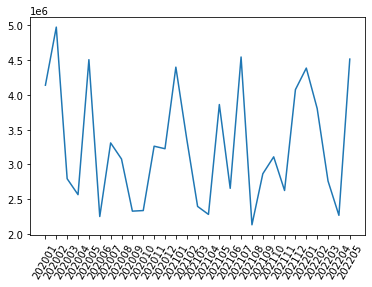

In [27]:
plt.plot(df.index, df['vendas'])
plt.xticks(ticks = df.index, labels=df['mes'], rotation = 60)
plt.show()

In [28]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [29]:
df['mes'] = pd.to_datetime(df['mes'],format= '%Y%m' ) 

In [30]:
df.index = df['mes']

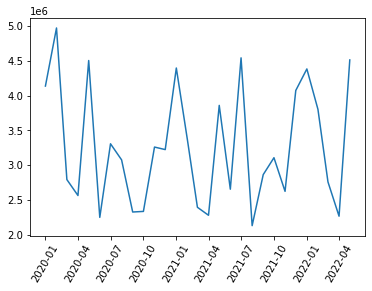

In [31]:
plt.plot(df.index, df['vendas'])
plt.xticks(rotation = 60)
plt.show()

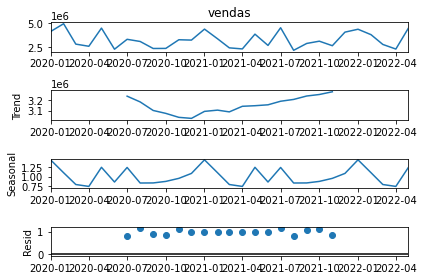

In [32]:
decompose_result = seasonal_decompose(df['vendas'],model='multiplicative')
decompose_result.plot()
plt.show()

In [33]:
df.index.freq = 'MS' ## set dataset index frequency to monthly
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

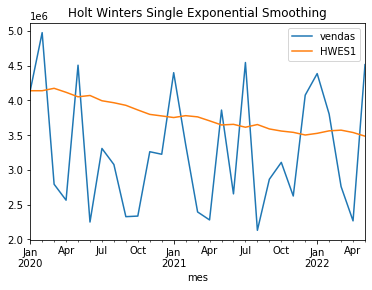

In [34]:
df['HWES1'] = SimpleExpSmoothing(df['vendas']).fit(smoothing_level=alpha,
                                                   optimized=False,use_brute=True).fittedvalues
df[['vendas','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

plt.show()

C:\Users\Rodrigo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Rodrigo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


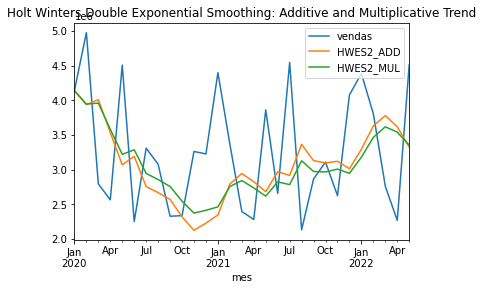

In [35]:
df['HWES2_ADD'] = ExponentialSmoothing(df['vendas'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['vendas'],trend='mul').fit().fittedvalues
df[['vendas','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')
plt.show()

In [36]:
treino = df[:24] ## até
teste = df[24:]## para frente

In [37]:
df.columns

Index(['mes', 'vendas', 'HWES1', 'HWES2_ADD', 'HWES2_MUL'], dtype='object')

C:\Users\Rodrigo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

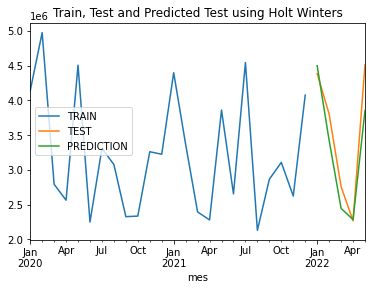

In [39]:

fitted_model = ExponentialSmoothing(treino['vendas'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(5)
treino['vendas'].plot(legend=True,label='TRAIN')
teste['vendas'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [40]:
test_predictions

2022-01-01    4.499678e+06
2022-02-01    3.425035e+06
2022-03-01    2.446319e+06
2022-04-01    2.285106e+06
2022-05-01    3.856814e+06
Freq: MS, dtype: float64